In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
train_data = np.array(pd.read_csv(".././mnist_train.csv"))
test_data = np.array(pd.read_csv(".././mnist_test.csv"))
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# to normalize the data set

In [253]:
X_train = train_data[:,1:].T/255
Y_train = train_data[:,0]
#one hot endcoding
Y_train = np.array([[(1 if i==y else 0) for i in range(0,10)] for y in Y_train]).T
print(Y_train)
X_test = test_data[:,1:].T/255
Y_test = test_data[:,0]
#one hot encoding
Y_test = np.array([[(1 if i==y else 0) for i in range(0,10)] for y in Y_test]).T
print(X_train.shape[0])

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
784


This is a  5


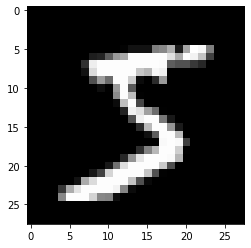

In [254]:
plt.imshow(train_data[0,1:].reshape(28,28))
print("This is a ",train_data[0,0])

In [380]:
def relu(x,p):
    if p==0:
        return np.maximum(x,0)
    if p==1:
        return (x>0)*np.ones(x.shape)

def linear(x,p):
    if p==0:
        return x
    if p==1:
        return np.ones(x.shape)

def softmax(x,p):
    if p==0:
        return np.exp(x)/np.sum(np.exp(x),axis=0,keepdims=True)


In [389]:
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * (np.sqrt(2 / layer_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
       

        
    return parameters

In [390]:
def linear_forward(X,layers_dims):
    A=[X]
    for l in range(1,len(layers_dims)):
        Z = np.dot(parameters["W"+str(l)],A[l-1]) + parameters["b"+str(l)]
        A1 = g[l](Z,0)
        A.append(A1)
    return A

In [391]:
def backward(A,dZl):
        m = A[-1].shape[1]
        dZi_prev = dZl
        for l in reversed(range(1,len(layers_dims))):
            dZi = dZi_prev
            grads["dW"+str(l)] = (1/m)*np.dot(dZi,A[l-1].T)
            grads["db"+str(l)] = (1/m)*np.sum(dZi, axis=1, keepdims=True)
            dZi_prev = np.dot(parameters["W"+str(l)].T,dZi)*g[l-1](A[l-1],1)
        return grads

In [392]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    L = -np.sum(Y*np.log(AL),axis=0)
    return L

In [440]:
def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations): #lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = []                    # keep track of cost
    # Parameters initialization.
    ### START CODE HERE ###
    
    ### END CODE HERE ###
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        A = linear_forward(X,layers_dims)
        m=Y.shape[1]
        cost = np.sum(compute_cost(A[-1],Y))*(1/m)
        costs.append(cost)
        dZl = A[-1]-Y
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = backward(A,dZl)
        for k in range(1,len(layers_dims)):
            parameters["W" + str(k )] = parameters["W" + str(k )] - learning_rate * grads["dW" + str(k )]
            parameters["b" + str(k )] = parameters["b" + str(k )] - learning_rate * grads["db" + str(k )]
    return costs


100%|██████████| 938/938 [00:04<00:00, 198.06it/s]


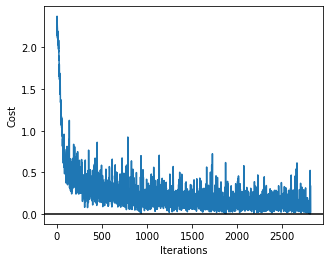

In [468]:
layers_dims = [X_train.shape[0], 60, 60,20,10] 
g = [linear,relu,relu,relu,softmax]
BATCH_SIZE = 64
EPOCHS = 3
costs = []
grads={}
parameters = initialize_parameters_deep(layers_dims)
for epoch in range(0,EPOCHS):
    for i in tqdm(range(0,X_train.shape[1],BATCH_SIZE)):
        X_batch = X_train[:,i:i+BATCH_SIZE]
        Y_batch = Y_train[:,i:i+BATCH_SIZE]
        c = L_layer_model(X_batch,Y_batch,layers_dims,learning_rate=0.05,num_iterations=1)
        costs.append(c)
plt.plot(costs)
plt.axhline(color="k")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [469]:
A=linear_forward(X_train,layers_dims)

print(A[-1].shape)

(10, 60000)


In [470]:
def predict(A,Y_train):
    Y_pred=np.round(A[-1])
    accuracy = (1- np.sum((Y_pred-Y_train)**2)/Y_train.shape[1])*100
    print(accuracy)

In [471]:
predict(A,Y_train)

93.08166666666666
